# **Harmonic Oscillator**

#### **1. Numerical Solutions using Stormer Verlet**

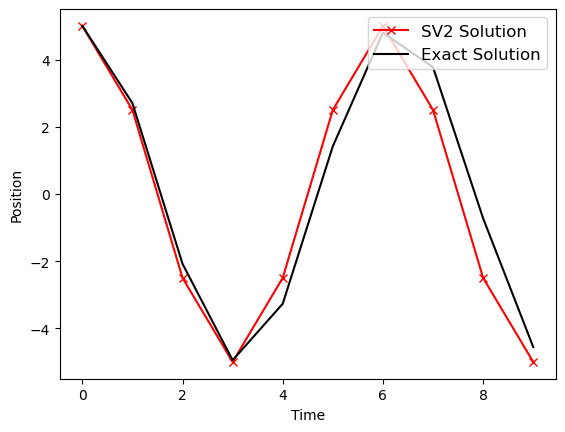

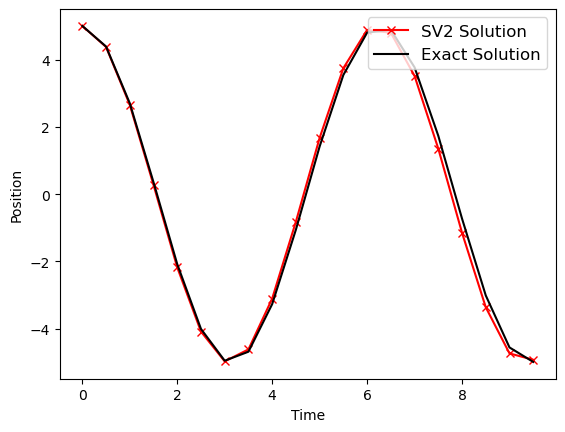

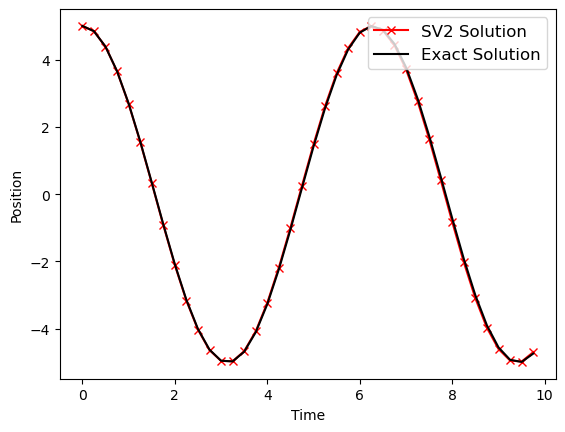

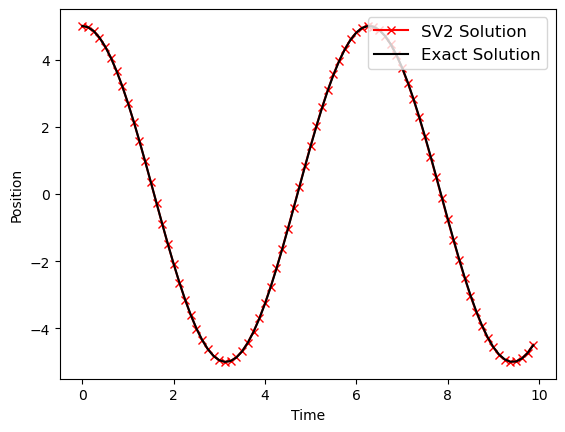

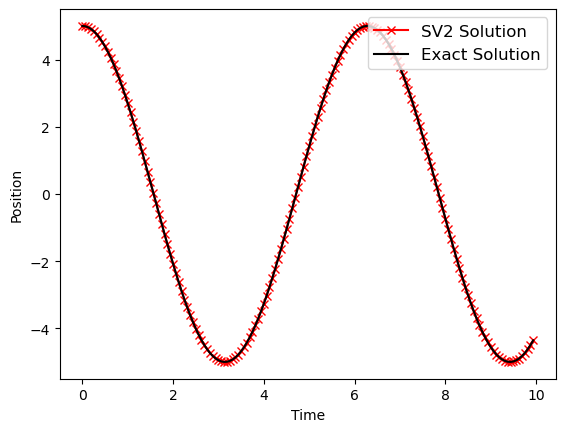

2.0010879848225223


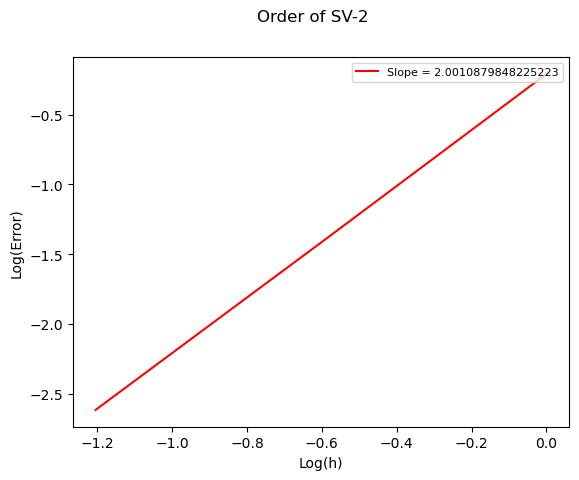

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D as ax

# Define the harmonic oscillator function
def harmonic_oscillator(q, k, m):
    return -k * q / m


def exactSolution(t: int, w0: int, q0: int):
    return q0 * np.cos(w0 * t)

# Stormer Verlet order 2 method for the provided q,v for each step in the loop.
def sv2(q, qOld, v, h, k, m):
    qNew = 2 * q - qOld + (h**2) * harmonic_oscillator(q, k, m)
    vNew = v + h/2 * (harmonic_oscillator(qNew, k, m) +
                      harmonic_oscillator(q, k, m))
    return qNew, vNew


def hamiltonian(q: float, v: float, k: float, m: float):
    return 1/2 * (m * (v**2) + k * (q**2))

# initial position, q0, in m.
# initial velocity, v0, in m/s.
# spring constant, k, in N/m.
# mass, m, in kg
# h: step size
# tmax: maximum time for
def solveEquation(q0: float, v0: float, k: float, m: float, h: float, tmax: int):

    # Initialize arrays to store the solution
    time = np.arange(0, tmax, h)
    q_approx = np.zeros_like(time)
    v_approx = np.zeros_like(time)
    q_exact = np.zeros_like(time)
    error_q = np.zeros_like(time)
    energy = np.zeros_like(time)

    # Set initial values and also required for RK2.
    q_approx[0] = q0
    v_approx[0] = v0
    q_exact[0] = q0
    energy[0] = hamiltonian(q_approx[0], v_approx[0], k, m)

    # initial values for stormer verlet
    q_approx[1] = q0 + v0 * h + 1/2 * harmonic_oscillator(q0, k, m) * (h**2)
    v_approx[1] = v0 + h/2 * (harmonic_oscillator(q_approx[1], k, m) + harmonic_oscillator(q_approx[0], k, m))
    
    q_exact[1] = exactSolution(time[0] + h, np.sqrt(k/m), q0)
    error_q[1] = abs(q_exact[1] - q_approx[1])
    energy[1] = hamiltonian(q_approx[1], v_approx[1], k, m)

    for i in range(1, len(time) - 1):
        # for stormer-verlet
        q_approx[i+1], v_approx[i+1] = sv2(q_approx[i], q_approx[i-1], v_approx[i], h, k, m)

        # finding the exact solution of the harmonic oscillator equation
        q_exact[i+1] = exactSolution(time[i+1], np.sqrt(k/m), q0)
        # finding the error between the numerical value and the exact value at a given time
        error_q[i+1] = abs(q_exact[i+1] - q_approx[i+1])
        energy[i+1] = hamiltonian(q_approx[i+1], v_approx[i+1], k, m)

    fig, ax = plt.subplots()

    ax.plot(time, q_approx, color='red', marker='x', label='SV2 Solution')
    ax.plot(time, q_exact, color='black', label='Exact Solution')

    ax.set_xlabel("Time")
    ax.set_ylabel("Position")
    ax.legend(loc="upper right", fontsize=12)

    plt.show()
    plt.close()

    # # used when plotting energy for the applied numerical method
    # return energy

    # # used when verifying the numerical method.
    return abs(error_q.mean())


q0 = 5.0        # initial position in m.
v0 = 0.0        # initial velocity in m/s.
k = 1.0      # spring constant in N/m.
m = 1.0         # mass in kg.
h = 1.0        # step size
tmax = 10       # time for the system

n = 5
log_h = np.zeros(n)
log_error = np.zeros(n)

for i in range(n):
    error = solveEquation(q0, v0, k, m, h, tmax)

    log_h[i] = np.log10(h)
    log_error[i] = np.log10(error)

    h = h / 2

# # Code to show the Energy for the applied method
# solveEquation(q0, v0, k, m, h, tmax)

dy = log_error[len(log_error) - 1] - log_error[0]
dx = log_h[len(log_h) - 1] - log_h[0]
slope = dy/dx
print(slope)

fig, ax = plt.subplots()
fig.suptitle('Order of SV-2')

ax.plot(log_h, log_error, color="red", label="Slope = {}".format(slope))

ax.set_xlabel('Log(h)')
ax.set_ylabel('Log(Error)')

ax.legend(loc="upper right", fontsize=8)
# plt.savefig("Order_AB.png")

plt.show()

#### **2. Numerical Solutions using Runge Kutta**

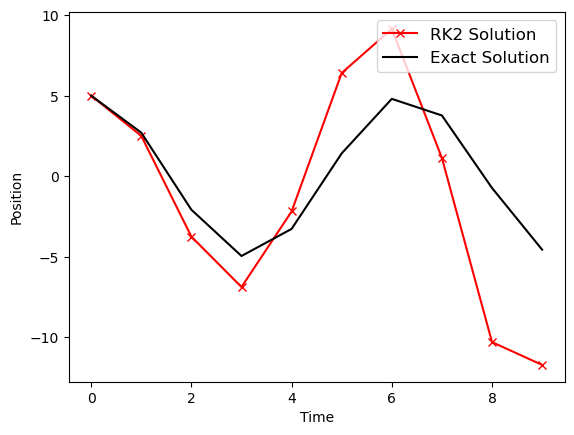

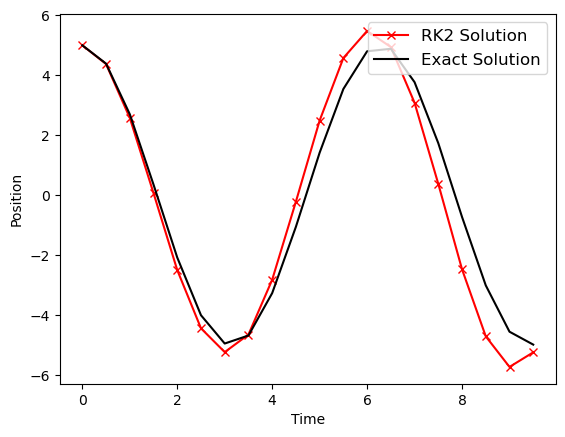

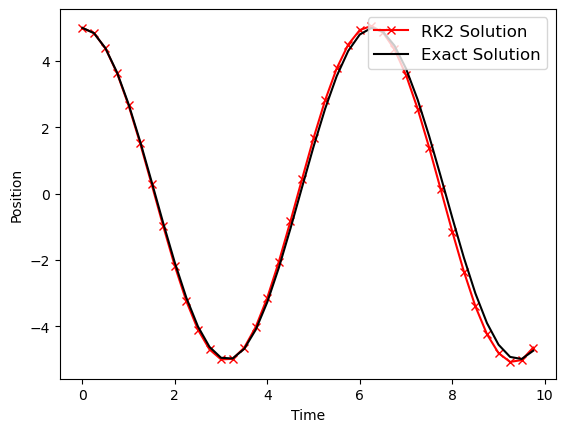

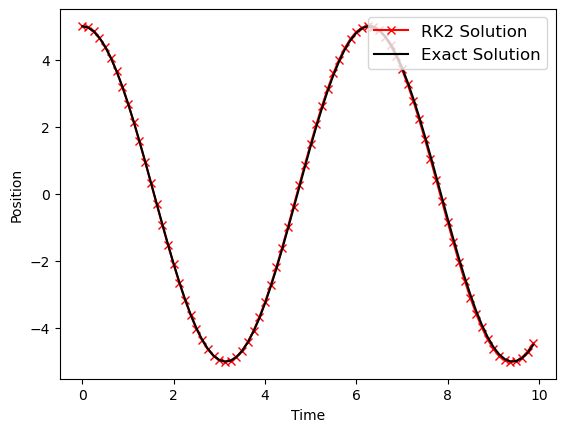

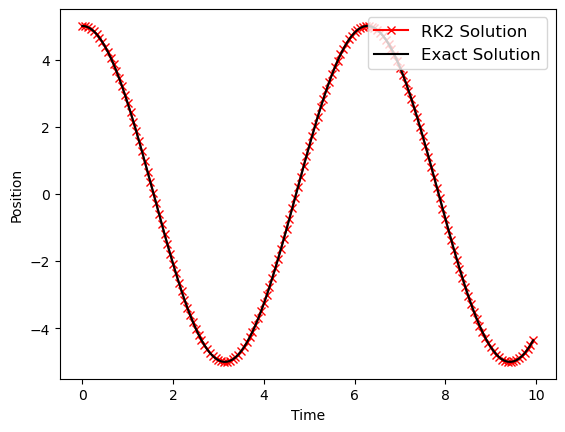

2.1093561726673036


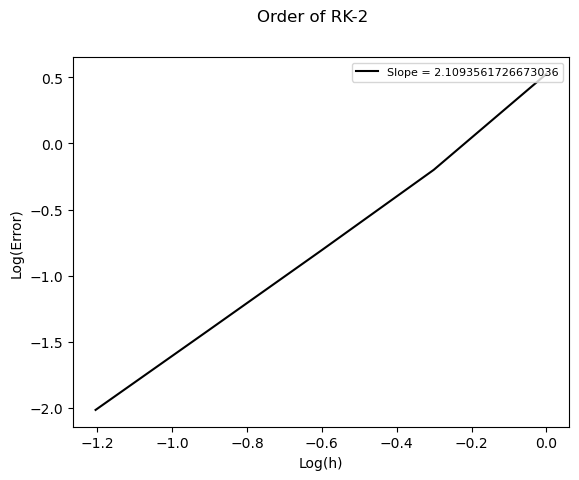

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D as ax


# Define the harmonic oscillator function
def harmonic_oscillator(q, k, m):
    return -k * q / m


def exactSolution(t: int, w0: int, q0: int):
    return q0 * np.cos(w0 * t)


# RK order 2 method for the provided q and v for each step in the loop
def rk2(q, v, h, k, m):
    k1v = harmonic_oscillator(q, k, m)
    k2v = harmonic_oscillator(q + h * v, k, m)

    k1x = v
    k2x = (v + h * k1v)

    v_new = v + (h/2) * (k1v + k2v)
    x_new = q + (h/2) * (k1x + k2x)
    return x_new, v_new


def hamiltonian(q: float, v: float, k: float, m: float):
    return 1/2 * (m * (v**2) + k * (q**2))


# initial position, q0, in m.
# initial velocity, v0, in m/s.
# spring constant, k, in N/m.
# mass, m, in kg
# h: step size
# tmax: maximum time for
def solveEquation(q0: float, v0: float, k: float, m: float, h: float, tmax: int):

    # Initialize arrays to store the solution
    time = np.arange(0, tmax, h)
    q_approx = np.zeros_like(time)
    v_approx = np.zeros_like(time)
    q_exact = np.zeros_like(time)
    error_q = np.zeros_like(time)
    energy = np.zeros_like(time)

    # Set initial values and also required for RK2.
    q_approx[0] = q0
    v_approx[0] = v0
    q_exact[0] = q0
    energy[0] = hamiltonian(q_approx[0], v_approx[0], k, m)

    for i in range(0, len(time) - 1):

        # for rk-2
        q_approx[i+1], v_approx[i+1] = rk2(q_approx[i], v_approx[i], h, k, m)

        # finding the exact solution of the harmonic oscillator equation
        q_exact[i+1] = exactSolution(time[i+1], np.sqrt(k/m), q0)
        # finding the error between the numerical value and the exact value at a given time
        error_q[i+1] = abs(q_exact[i+1] - q_approx[i+1])
        energy[i+1] = hamiltonian(q_approx[i+1], v_approx[i+1], k, m)

    fig, ax = plt.subplots()

    ax.plot(time, q_approx, color='red', marker='x', label='RK2 Solution')
    ax.plot(time, q_exact, color='black', label='Exact Solution')

    ax.set_xlabel("Time")
    ax.set_ylabel("Position")
    ax.legend(loc="upper right", fontsize=12)

    plt.show()
    plt.close()

    # # used when verifying the numerical method.
    return abs(error_q.mean())


q0 = 5.0        # initial position in m.
v0 = 0.0        # initial velocity in m/s.
k = 1.0      # spring constant in N/m.
m = 1.0         # mass in kg.
h = 1.0        # step size
tmax = 10       # time for the system

n = 5
log_h = np.zeros(n)
log_error = np.zeros(n)

for i in range(n):
    error = solveEquation(q0, v0, k, m, h, tmax)

    log_h[i] = np.log10(h)
    log_error[i] = np.log10(error)

    h = h / 2

# # Code to show the Energy for the applied method
# solveEquation(q0, v0, k, m, h, tmax)

dy = log_error[len(log_error) - 1] - log_error[0]
dx = log_h[len(log_h) - 1] - log_h[0]
slope = dy/dx
print(slope)

fig, ax = plt.subplots()
fig.suptitle('Order of RK-2')

ax.plot(log_h, log_error, color="black", label="Slope = {}".format(slope))

ax.set_xlabel('Log(h)')
ax.set_ylabel('Log(Error)')

ax.legend(loc="upper right", fontsize=8)
# plt.savefig("Order_AB.png")

plt.show()

#### **Numerical Solution using Adam Moulton**

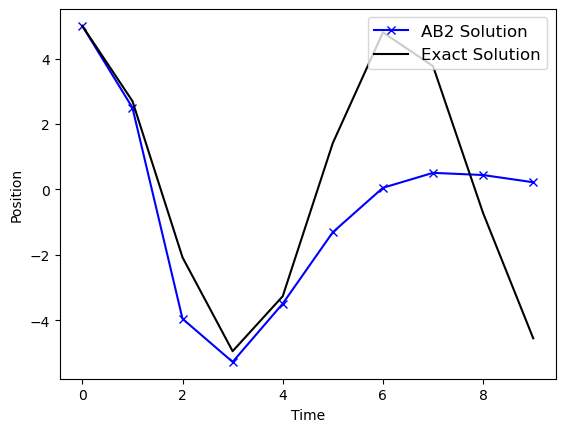

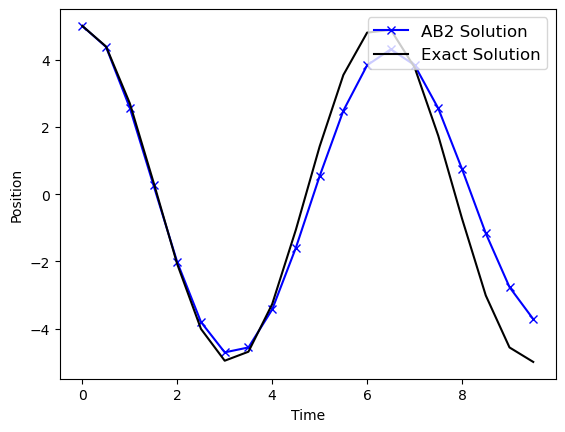

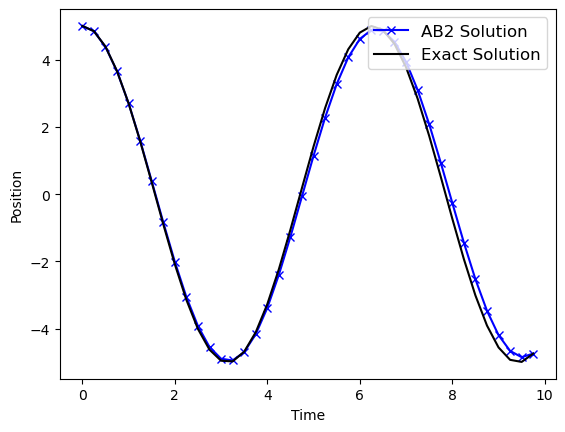

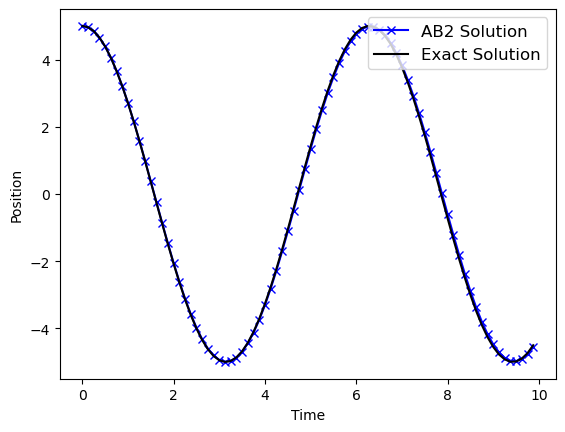

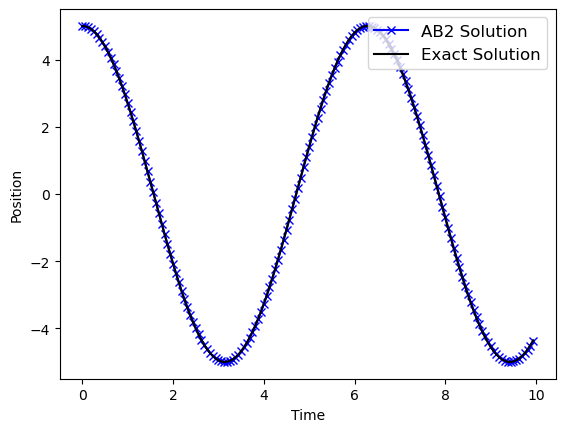

1.8456179775278296


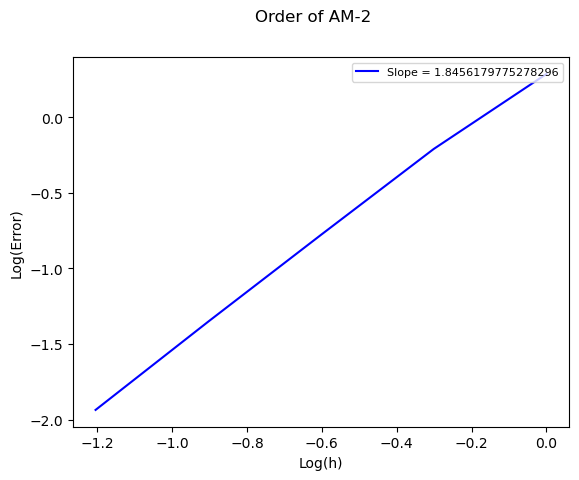

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D as ax


# Define the harmonic oscillator function
def harmonic_oscillator(q, k, m):
    return -k * q / m


def exactSolution(t: int, w0: int, q0: int):
    return q0 * np.cos(w0 * t)


def g(qn: float, yn: float, vn: float, h: float, k: float, m: float):
    return vn + h * (harmonic_oscillator(qn, k, m) + harmonic_oscillator(yn, k, m))


def FPI(yn: float, vn: float, h: float, k: float, m: float, tol: float, cap: int):
    q = yn
    new_q = yn + h * g(q, yn, vn, h, k, m)

    i = 0
    while (abs(new_q - q) < tol and i < cap):
        q = new_q
        new_q = yn + h * g(q, yn, vn, h, k, m)
        i = i + 1

    return new_q


# RK order 2 method for the provided q and v for each step in the loop
def rk2(q, v, h, k, m):
    k1v = harmonic_oscillator(q, k, m)
    k2v = harmonic_oscillator(q + h * v, k, m)

    k1x = v
    k2x = (v + h * k1v)

    v_new = v + (h/2) * (k1v + k2v)
    x_new = q + (h/2) * (k1x + k2x)
    return x_new, v_new


# Adam Moulton order 2 method for the provided q,v and qOld, vOld for each step in the loop.
def am2(q, v, qOld, vOld, h, k, m):
    fCurr = harmonic_oscillator(q, k, m)
    fOld = harmonic_oscillator(qOld, k, m)

    qPred = FPI(q, v, h, k, m, 1e-3, 200)
    vPred = v + h * fCurr
    fPred = harmonic_oscillator(qPred, k, m)

    qNew = q + h * (5/12 * vPred + 8/12 * v - 1/12 * vOld)
    v_new = v + h * (5/12 * fPred + 8/12 * fCurr - 1/12 * fOld)
    return qNew, v_new


def hamiltonian(q: float, v: float, k: float, m: float):
    return 1/2 * (m * (v**2) + k * (q**2))


# initial position, q0, in m.
# initial velocity, v0, in m/s.
# spring constant, k, in N/m.
# mass, m, in kg
# h: step size
# tmax: maximum time for
def solveEquation(q0: float, v0: float, k: float, m: float, h: float, tmax: int):

    # Initialize arrays to store the solution
    time = np.arange(0, tmax, h)
    q_approx = np.zeros_like(time)
    v_approx = np.zeros_like(time)
    q_exact = np.zeros_like(time)
    error_q = np.zeros_like(time)
    energy = np.zeros_like(time)

    # Set initial values and also required for RK2.
    q_approx[0] = q0
    v_approx[0] = v0
    q_exact[0] = q0
    energy[0] = hamiltonian(q_approx[0], v_approx[0], k, m)

    # intitial values for am-2 and ab-2
    q_approx[1], v_approx[1] = rk2(q_approx[0], v_approx[0], h, k, m)
    q_exact[1] = exactSolution(time[1], np.sqrt(k/m), q0)
    error_q[1] = abs(q_exact[1] - q_approx[1])
    energy[1] = hamiltonian(q_approx[1], v_approx[1], k, m)

    for i in range(1, len(time) - 1):
        # for AM-2 and AB-2
        q_approx[i+1], v_approx[i+1] = am2(q_approx[i], v_approx[i], q_approx[i-1], v_approx[i-1], h, k, m)

        # finding the exact solution of the harmonic oscillator equation
        q_exact[i+1] = exactSolution(time[i+1], np.sqrt(k/m), q0)
        # finding the error between the numerical value and the exact value at a given time
        error_q[i+1] = abs(q_exact[i+1] - q_approx[i+1])
        energy[i+1] = hamiltonian(q_approx[i+1], v_approx[i+1], k, m)

    fig, ax = plt.subplots()

    ax.plot(time, q_approx, color='blue', marker='x', label='AB2 Solution')
    ax.plot(time, q_exact, color='black', label='Exact Solution')

    ax.set_xlabel("Time")
    ax.set_ylabel("Position")
    ax.legend(loc="upper right", fontsize=12)

    plt.show()
    plt.close()

    # # used when plotting energy for the applied numerical method
    # return energy

    # # used when verifying the numerical method.
    return abs(error_q.mean())


q0 = 5.0        # initial position in m.
v0 = 0.0        # initial velocity in m/s.
k = 1.0      # spring constant in N/m.
m = 1.0         # mass in kg.
h = 1.0        # step size
tmax = 10       # time for the system

n = 5
log_h = np.zeros(n)
log_error = np.zeros(n)

for i in range(n):
    error = solveEquation(q0, v0, k, m, h, tmax)

    log_h[i] = np.log10(h)
    log_error[i] = np.log10(error)

    h = h / 2

# # Code to show the Energy for the applied method
# solveEquation(q0, v0, k, m, h, tmax)

dy = log_error[len(log_error) - 1] - log_error[0]
dx = log_h[len(log_h) - 1] - log_h[0]
slope = dy/dx
print(slope)

fig, ax = plt.subplots()
fig.suptitle('Order of AM-2')

ax.plot(log_h, log_error, color="blue", label="Slope = {}".format(slope))

ax.set_xlabel('Log(h)')
ax.set_ylabel('Log(Error)')

ax.legend(loc="upper right", fontsize=8)
# plt.savefig("Order_AB.png")

plt.show()

#### **Numerical Solution using Adam Bash-forth**

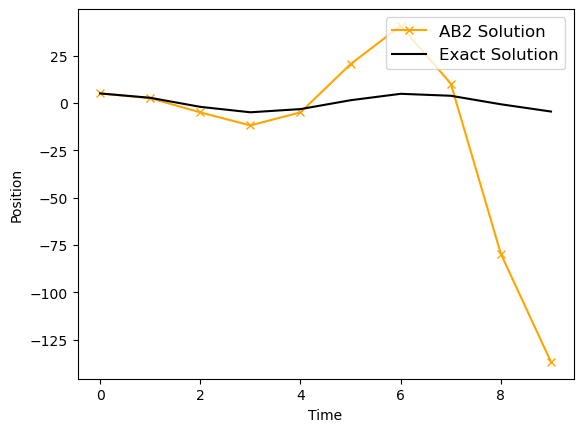

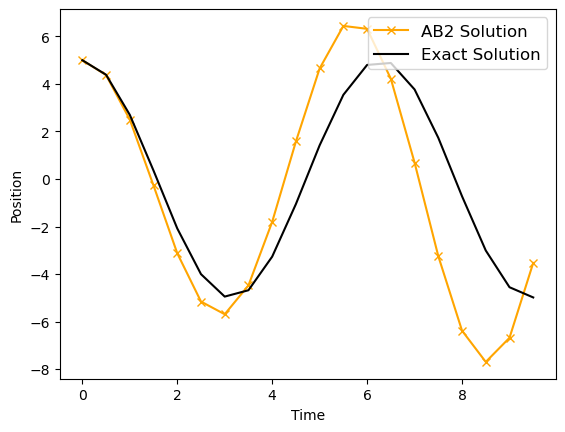

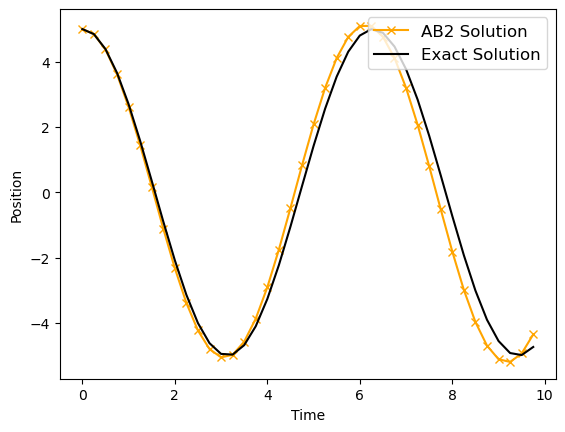

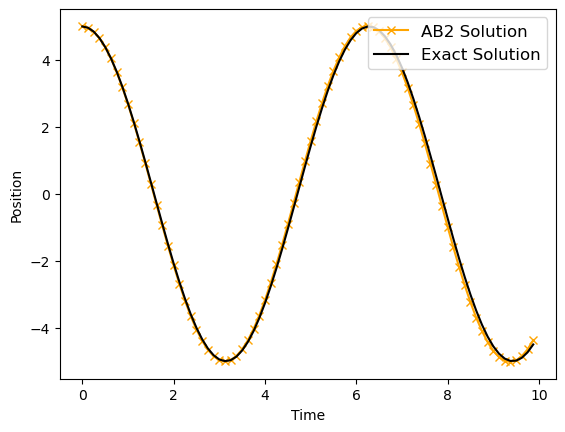

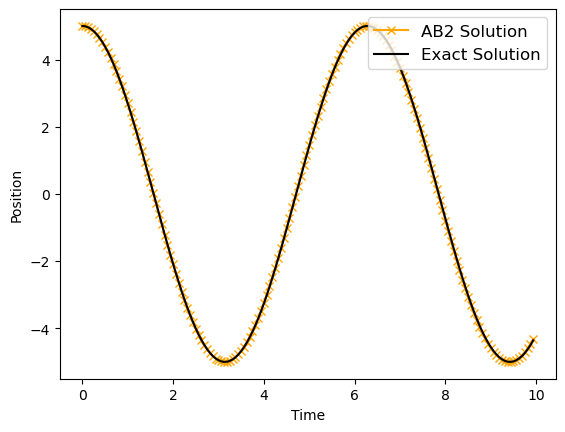

2.551230617855399


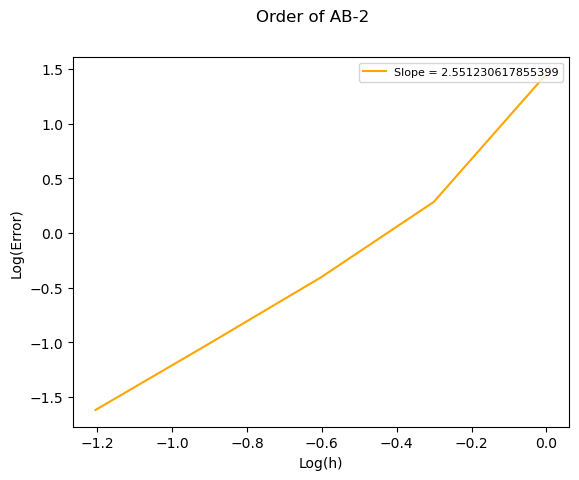

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D as ax

# Define the harmonic oscillator function
def harmonic_oscillator(q, k, m):
    return -k * q / m

def exactSolution(t: int, w0: int, q0: int):
    return q0 * np.cos(w0 * t)

# RK order 2 method for the provided q and v for each step in the loop
def rk2(q, v, h, k, m):
    k1v = harmonic_oscillator(q, k, m)
    k2v = harmonic_oscillator(q + h * v, k, m)

    k1x = v
    k2x = (v + h * k1v)

    v_new = v + (h/2) * (k1v + k2v)
    q_new = q + (h/2) * (k1x + k2x)
    return q_new, v_new

# Adam Bashford order 2 method for the provided q,v and qOld, vOld for each step in the loop.
def ab2(q, v, qOld, vOld, h, k, m):
    qNew = q + h * (3/2 * v - 1/2 * vOld)

    vNew = v + h * (3/2 * harmonic_oscillator(q, k, m) -
                    1/2 * harmonic_oscillator(qOld, k, m))
    return qNew, vNew

def hamiltonian(q: float, v: float, k: float, m: float):
    return 1/2 * (m * (v**2) + k * (q**2))


# initial position: q0, in m.
# initial velocity: v0, in m/s.
# spring constant: k in N/m.
# mass: m in kg
# h: step size
# tmax: maximum time for
def solveEquation(q0: float, v0: float, k: float, m: float, h: float, tmax: int):

    # Initialize arrays to store the solution
    time = np.arange(0, tmax, h)
    q_approx = np.zeros_like(time)
    v_approx = np.zeros_like(time)
    q_exact = np.zeros_like(time)
    error_q = np.zeros_like(time)
    energy = np.zeros_like(time)

    # Set initial values and also required for RK2.
    q_approx[0] = q0
    v_approx[0] = v0
    q_exact[0] = q0
    energy[0] = hamiltonian(q_approx[0], v_approx[0], k, m)

    # intitial values for am-2 and ab-2
    q_approx[1], v_approx[1] = rk2(q_approx[0], v_approx[0], h, k, m)
    q_exact[1] = exactSolution(time[1], np.sqrt(k/m), q0)
    error_q[1] = abs(q_exact[1] - q_approx[1])
    energy[1] = hamiltonian(q_approx[1], v_approx[1], k, m)

    for i in range(1, len(time) - 1):
        # for AM-2 and AB-2
        q_approx[i+1], v_approx[i+1] = ab2(q_approx[i], v_approx[i], q_approx[i-1], v_approx[i-1], h, k, m)

        # finding the exact solution of the harmonic oscillator equation
        q_exact[i+1] = exactSolution(time[i+1], np.sqrt(k/m), q0)
        # finding the error between the numerical value and the exact value at a given time
        error_q[i+1] = abs(q_exact[i+1] - q_approx[i+1])
        energy[i+1] = hamiltonian(q_approx[i+1], v_approx[i+1], k, m)

    fig, ax = plt.subplots()

    ax.plot(time, q_approx, color='orange', marker='x', label='AB2 Solution')
    ax.plot(time, q_exact, color='black', label='Exact Solution')

    ax.set_xlabel("Time")
    ax.set_ylabel("Position")
    ax.legend(loc="upper right", fontsize=12)

    plt.show()
    plt.close()

    # # used when verifying the numerical method.
    return abs(error_q.mean())


q0 = 5.0        # initial position in m.
v0 = 0.0        # initial velocity in m/s.
k = 1.0      # spring constant in N/m.
m = 1.0         # mass in kg.
h = 1.0        # step size
tmax = 10       # time for the system

n = 5
log_h = np.zeros(n)
log_error = np.zeros(n)

for i in range(n):
    error = solveEquation(q0, v0, k, m, h, tmax)

    log_h[i] = np.log10(h)
    log_error[i] = np.log10(error)

    h = h / 2

# # Code to show the Energy for the applied method
# solveEquation(q0, v0, k, m, h, tmax)

dy = log_error[len(log_error) - 1] - log_error[0]
dx = log_h[len(log_h) - 1] - log_h[0]
slope = dy/dx
print(slope)

fig, ax = plt.subplots()
fig.suptitle('Order of AB-2')

ax.plot(log_h, log_error, color="orange", label="Slope = {}".format(slope))

ax.set_xlabel('Log(h)')
ax.set_ylabel('Log(Error)')

ax.legend(loc="upper right", fontsize=8)

plt.show()

# **Three-body Problem**

#### **1. Figure-8 Solution**

Time =  100


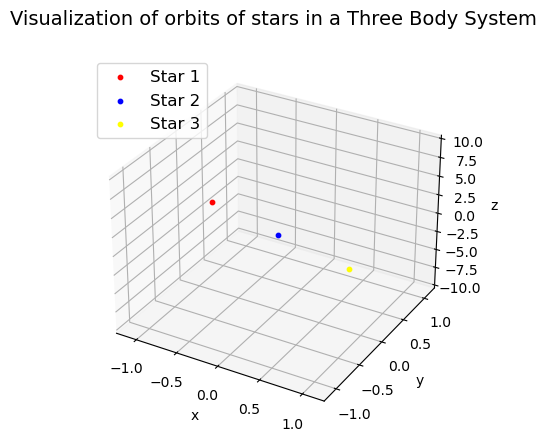

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D as ax
from matplotlib import animation
from IPython.display import HTML

# function for particle 1
def f1(q1i: float, q2i: float, q3i: float, q1: np.array, q2: np.array, q3: np.array, mass: np.array, G: float):
    numerator12 = - G * mass[1] * (q1i - q2i)
    numerator13 = - G * mass[2] * (q1i - q3i)

    q12 = np.linalg.norm(q1 - q2)
    q13 = np.linalg.norm(q1 - q3)

    return (numerator12/(q12**3)) + (numerator13/(q13**3))


# function for particle 2
def f2(q1i: float, q2i: float, q3i: float, q1: np.array, q2: np.array, q3: np.array, mass: np.array, G: float):
    numerator21 = - G * mass[0] * (q2i - q1i)
    numerator23 = - G * mass[2] * (q2i - q3i)

    q21 = np.linalg.norm(q2 - q1)
    q23 = np.linalg.norm(q2 - q3)

    return (numerator21/(q21**3)) + (numerator23/(q23**3))


# function for particle 3
def f3(q1i: float, q2i: float, q3i: float, q1: np.array, q2: np.array, q3: np.array, mass: np.array, G: float):
    numerator31 = - G * mass[0] * (q3i - q1i)
    numerator32 = - G * mass[1] * (q3i - q2i)

    q31 = np.linalg.norm(q3 - q1)
    q32 = np.linalg.norm(q3 - q2)

    return (numerator31/(q31**3)) + (numerator32/(q32**3))


# rk2 method for particle 1
def rk2_p1(q1: np.array, q2: np.array, q3: np.array, v1: np.array, v2: np.array, v3: np.array, h: float, mass: np.array, G: float):
    q1x = q1[0]
    q1y = q1[1]
    v1x = v1[0]
    v1y = v1[1]

    q2x = q2[0]
    q2y = q2[1]
    v2x = v2[0]
    v2y = v2[1]

    q3x = q3[0]
    q3y = q3[1]
    v3x = v3[0]
    v3y = v3[1]

    # for x component of particle 1
    k1vx = f1(q1x, q2x, q3x, q1, q2, q3, mass, G)
    k2vx = f1(q1x + h * v1x, q2x + h * v2x, q3x + h * v3x,
              q1 + h * v1, q2 + h * v2, q3 + h * v3, mass, G)

    k1qx = v1x
    k2qx = (v1x + h * k1vx)

    v_new_x = v1x + (h/2) * (k1vx + k2vx)
    q_new_x = q1x + (h/2) * (k1qx + k2qx)

    # for y component of particle 1
    k1vy = f1(q1y, q2y, q3y, q1, q2, q3, mass, G)
    k2vy = f1(q1y + h * v1y, q2y + h * v2y, q3y + h*v3y,
              q1 + h * v1, q2 + h * v2, q3 + h * v3, mass, G)

    k1qy = v1y
    k2qy = (v1y + h * k1vy)

    v_new_y = v1y + (h/2) * (k1vy + k2vy)
    q_new_y = q1y + (h/2) * (k1qy + k2qy)

    return q_new_x, v_new_x, q_new_y, v_new_y


# rk2 method for particle 2
def rk2_p2(q1: np.array, q2: np.array, q3: np.array, v1: np.array, v2: np.array, v3: np.array, h: float, mass: np.array, G: float):
    q1x = q1[0]
    q1y = q1[1]
    v1x = v1[0]
    v1y = v1[1]

    q2x = q2[0]
    q2y = q2[1]
    v2x = v2[0]
    v2y = v2[1]

    q3x = q3[0]
    q3y = q3[1]
    v3x = v3[0]
    v3y = v3[1]

    # for x component of particle 2
    k1vx = f2(q1x, q2x, q3x, q1, q2, q3, mass, G)
    k2vx = f2(q1x + h * v1x, q2x + h * v2x, q3x + h * v3x,
              q1 + h * v1, q2 + h * v2, q3 + h * v3, mass, G)

    k1qx = v2x
    k2qx = (v2x + h * k1vx)

    v_new_x = v2x + (h/2) * (k1vx + k2vx)
    q_new_x = q2x + (h/2) * (k1qx + k2qx)

    # for y component of particle 2
    k1vy = f2(q1y, q2y, q3y, q1, q2, q3, mass, G)
    k2vy = f2(q1y + h * v1y, q2y + h * v2y, q3y + h * v3y,
              q1 + h * v1, q2 + h * v2, q3 + h * v3, mass, G)

    k1qy = v2y
    k2qy = (v2y + h * k1vy)

    v_new_y = v2y + (h/2) * (k1vy + k2vy)
    q_new_y = q2y + (h/2) * (k1qy + k2qy)

    return q_new_x, v_new_x, q_new_y, v_new_y


def rk2_p3(q1: np.array, q2: np.array, q3: np.array, v1: np.array, v2: np.array, v3: np.array, h: float, mass: np.array, G: float):
    q1x = q1[0]
    q1y = q1[1]
    v1x = v1[0]
    v1y = v1[1]

    q2x = q2[0]
    q2y = q2[1]
    v2x = v2[0]
    v2y = v2[1]

    q3x = q3[0]
    q3y = q3[1]
    v3x = v3[0]
    v3y = v3[1]

    # for x component of particle 3
    k1vx = f3(q1x, q2x, q3x, q1, q2, q3, mass, G)
    k2vx = f3(q1x + h * v1x, q2x + h * v2x, q3x + h * v3x,
              q1 + h * v1, q2 + h * v2, q3 + h * v3, mass, G)

    k1qx = v3x
    k2qx = (v3x + h * k1vx)

    v_new_x = v3x + (h/2) * (k1vx + k2vx)
    q_new_x = q3x + (h/2) * (k1qx + k2qx)

    # for y component of particle 3
    k1vy = f3(q1y, q2y, q3y, q1, q2, q3, mass, G)
    k2vy = f3(q1y + h * v1y, q2y + h * v2y, q3y + h * v3y,
              q1 + h * v1, q2 + h * v2, q3 + h * v3, mass, G)

    k1qy = v3y
    k2qy = (v3y + h * k1vy)

    v_new_y = v3y + (h/2) * (k1vy + k2vy)
    q_new_y = q3y + (h/2) * (k1qy + k2qy)

    return q_new_x, v_new_x, q_new_y, v_new_y

def runMain(tmax: int, h: float, time: np.array):
    # G = 6.6743e-11 # original value of G.

    # 8-Figure system initial conditions
    G = 1
    mass = np.array([1, 1, 1])
    # q0[0] position for particle 1, q[1] for particle 2, q[2] for particle 3
    q0 = np.array([[-0.97000436, 0.24308753], [0.0, 0.0], [0.97000436, -0.24308753]])
    # v0[0] velocity for particle 1, v0[1] for particle 2, v[2] for particle 3
    v0 = np.array([[0.4662036850, 0.4323657300], [-0.93240737, -0.86473146], [0.4662036850, 0.4323657300]])

    q1x = np.zeros_like(time)
    q1y = np.zeros_like(time)

    q2x = np.zeros_like(time)
    q2y = np.zeros_like(time)

    q3x = np.zeros_like(time)
    q3y = np.zeros_like(time)

    v1x = np.zeros_like(time)
    v1y = np.zeros_like(time)

    v2x = np.zeros_like(time)
    v2y = np.zeros_like(time)

    v3x = np.zeros_like(time)
    v3y = np.zeros_like(time)

    q1x[0], q1y[0] = q0[0]
    q2x[0], q2y[0] = q0[1]
    q3x[0], q3y[0] = q0[2]

    v1x[0], v1y[0] = v0[0]
    v2x[0], v2y[0] = v0[1]
    v3x[0], v3y[0] = v0[2]

    for i in range(0, len(time) - 1):
        temp_q1 = np.array([q1x[i], q1y[i]])
        temp_q2 = np.array([q2x[i], q2y[i]])
        temp_q3 = np.array([q3x[i], q3y[i]])

        temp_v1 = np.array([v1x[i], v1y[i]])
        temp_v2 = np.array([v2x[i], v2y[i]])
        temp_v3 = np.array([v3x[i], v3y[i]])

        # For particle 1
        q1x[i+1], v1x[i+1], q1y[i+1], v1y[i +
                                          1] = rk2_p1(temp_q1, temp_q2, temp_q3, temp_v1, temp_v2, temp_v3, h, mass, G)

        # For particle 2
        q2x[i+1], v2x[i+1], q2y[i+1], v2y[i +
                                          1] = rk2_p2(temp_q1, temp_q2, temp_q3, temp_v1, temp_v2, temp_v3, h, mass, G)

        # For particle 3
        q3x[i+1], v3x[i+1], q3y[i+1], v3y[i +
                                          1] = rk2_p3(temp_q1, temp_q2, temp_q3, temp_v1, temp_v2, temp_v3, h, mass, G)

    return q1x, q1y, q2x, q2y, q3x, q3y


# time for the iterations
tmax = 1
# this is dt, i.e. the step size
h = 0.01
# time array based on the tmax and step size
time = np.arange(0, tmax, h)

print("Time = ", len(time))

q1x, q1y, q2x, q2y, q3x, q3y = runMain(tmax, h, time)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

def update(i):
    ax.clear()
    lim = 1.2  # for Figure-8 system

    # plotting particle 1
    ax.plot(q1x[:i+1], q1y[:i+1], 0, c='red')
    ax.scatter(q1x[i], q1y[i], color="red", marker="o", s=10, label="Star 1")

    # plotting particle 2
    ax.plot(q2x[:i+1], q2y[:i+1], 0, c='blue')
    ax.scatter(q2x[i], q2y[i], color="blue", marker="o", s=10, label="Star 2")

    # plotting particle 3
    ax.plot(q3x[:i+1], q3y[:i+1], 0, c='yellow')
    ax.scatter(q3x[i], q3y[i], color="yellow", marker="o", s=10, label="Star 3")

    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)
    ax.set_zlim(-10, 10)

    ax.set_xlabel("x", fontsize=10)
    ax.set_ylabel("y", fontsize=10)
    ax.set_zlabel("z", fontsize=10)

    ax.set_title("Visualization of orbits of stars in a Three Body System\n", fontsize=14)
    ax.legend(loc="upper left", fontsize=12)


anim = animation.FuncAnimation(fig, update, interval=tmax, frames=len(time))
# plt.show()

**The Simulation given below is a gif for the above given code**

<img src="3b_figure_8_system_2D.gif" width="750" align="center">
<img src="3b_figure_8_system_3D.gif" width="750" align="center">

#### **Sun Earth Jupiter System Simulation**

Time =  1000


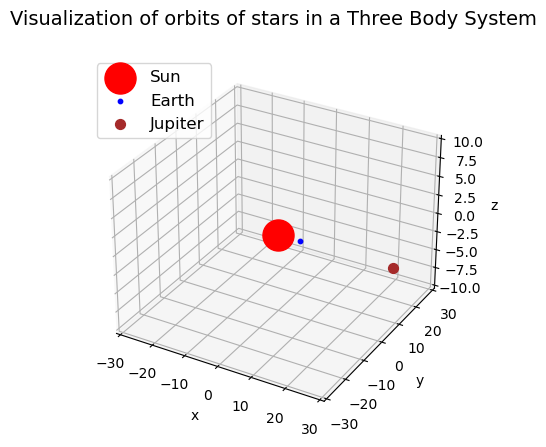

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D as ax
from matplotlib import animation
from IPython.display import HTML

# function for particle 1


def f1(q1i: float, q2i: float, q3i: float, q1: np.array, q2: np.array, q3: np.array, mass: np.array, G: float):
    numerator12 = - G * mass[1] * (q1i - q2i)
    numerator13 = - G * mass[2] * (q1i - q3i)

    q12 = np.linalg.norm(q1 - q2)
    q13 = np.linalg.norm(q1 - q3)

    return (numerator12/(q12**3)) + (numerator13/(q13**3))


# function for particle 2
def f2(q1i: float, q2i: float, q3i: float, q1: np.array, q2: np.array, q3: np.array, mass: np.array, G: float):
    numerator21 = - G * mass[0] * (q2i - q1i)
    numerator23 = - G * mass[2] * (q2i - q3i)

    q21 = np.linalg.norm(q2 - q1)
    q23 = np.linalg.norm(q2 - q3)

    return (numerator21/(q21**3)) + (numerator23/(q23**3))


# function for particle 3
def f3(q1i: float, q2i: float, q3i: float, q1: np.array, q2: np.array, q3: np.array, mass: np.array, G: float):
    numerator31 = - G * mass[0] * (q3i - q1i)
    numerator32 = - G * mass[1] * (q3i - q2i)

    q31 = np.linalg.norm(q3 - q1)
    q32 = np.linalg.norm(q3 - q2)

    return (numerator31/(q31**3)) + (numerator32/(q32**3))


# rk2 method for particle 1
def rk2_p1(q1: np.array, q2: np.array, q3: np.array, v1: np.array, v2: np.array, v3: np.array, h: float, mass: np.array, G: float):
    q1x = q1[0]
    q1y = q1[1]
    v1x = v1[0]
    v1y = v1[1]

    q2x = q2[0]
    q2y = q2[1]
    v2x = v2[0]
    v2y = v2[1]

    q3x = q3[0]
    q3y = q3[1]
    v3x = v3[0]
    v3y = v3[1]

    # for x component of particle 1
    k1vx = f1(q1x, q2x, q3x, q1, q2, q3, mass, G)
    k2vx = f1(q1x + h * v1x, q2x + h * v2x, q3x + h * v3x,
              q1 + h * v1, q2 + h * v2, q3 + h * v3, mass, G)

    k1qx = v1x
    k2qx = (v1x + h * k1vx)

    v_new_x = v1x + (h/2) * (k1vx + k2vx)
    q_new_x = q1x + (h/2) * (k1qx + k2qx)

    # for y component of particle 1
    k1vy = f1(q1y, q2y, q3y, q1, q2, q3, mass, G)
    k2vy = f1(q1y + h * v1y, q2y + h * v2y, q3y + h*v3y,
              q1 + h * v1, q2 + h * v2, q3 + h * v3, mass, G)

    k1qy = v1y
    k2qy = (v1y + h * k1vy)

    v_new_y = v1y + (h/2) * (k1vy + k2vy)
    q_new_y = q1y + (h/2) * (k1qy + k2qy)

    return q_new_x, v_new_x, q_new_y, v_new_y


# rk2 method for particle 2
def rk2_p2(q1: np.array, q2: np.array, q3: np.array, v1: np.array, v2: np.array, v3: np.array, h: float, mass: np.array, G: float):
    q1x = q1[0]
    q1y = q1[1]
    v1x = v1[0]
    v1y = v1[1]

    q2x = q2[0]
    q2y = q2[1]
    v2x = v2[0]
    v2y = v2[1]

    q3x = q3[0]
    q3y = q3[1]
    v3x = v3[0]
    v3y = v3[1]

    # for x component of particle 2
    k1vx = f2(q1x, q2x, q3x, q1, q2, q3, mass, G)
    k2vx = f2(q1x + h * v1x, q2x + h * v2x, q3x + h * v3x,
              q1 + h * v1, q2 + h * v2, q3 + h * v3, mass, G)

    k1qx = v2x
    k2qx = (v2x + h * k1vx)

    v_new_x = v2x + (h/2) * (k1vx + k2vx)
    q_new_x = q2x + (h/2) * (k1qx + k2qx)

    # for y component of particle 2
    k1vy = f2(q1y, q2y, q3y, q1, q2, q3, mass, G)
    k2vy = f2(q1y + h * v1y, q2y + h * v2y, q3y + h * v3y,
              q1 + h * v1, q2 + h * v2, q3 + h * v3, mass, G)

    k1qy = v2y
    k2qy = (v2y + h * k1vy)

    v_new_y = v2y + (h/2) * (k1vy + k2vy)
    q_new_y = q2y + (h/2) * (k1qy + k2qy)

    return q_new_x, v_new_x, q_new_y, v_new_y


def rk2_p3(q1: np.array, q2: np.array, q3: np.array, v1: np.array, v2: np.array, v3: np.array, h: float, mass: np.array, G: float):
    q1x = q1[0]
    q1y = q1[1]
    v1x = v1[0]
    v1y = v1[1]

    q2x = q2[0]
    q2y = q2[1]
    v2x = v2[0]
    v2y = v2[1]

    q3x = q3[0]
    q3y = q3[1]
    v3x = v3[0]
    v3y = v3[1]

    # for x component of particle 3
    k1vx = f3(q1x, q2x, q3x, q1, q2, q3, mass, G)
    k2vx = f3(q1x + h * v1x, q2x + h * v2x, q3x + h * v3x,
              q1 + h * v1, q2 + h * v2, q3 + h * v3, mass, G)

    k1qx = v3x
    k2qx = (v3x + h * k1vx)

    v_new_x = v3x + (h/2) * (k1vx + k2vx)
    q_new_x = q3x + (h/2) * (k1qx + k2qx)

    # for y component of particle 3
    k1vy = f3(q1y, q2y, q3y, q1, q2, q3, mass, G)
    k2vy = f3(q1y + h * v1y, q2y + h * v2y, q3y + h * v3y,
              q1 + h * v1, q2 + h * v2, q3 + h * v3, mass, G)

    k1qy = v3y
    k2qy = (v3y + h * k1vy)

    v_new_y = v3y + (h/2) * (k1vy + k2vy)
    q_new_y = q3y + (h/2) * (k1qy + k2qy)

    return q_new_x, v_new_x, q_new_y, v_new_y


def runMain(tmax: int, h: float, time: np.array):
    # G = 6.6743e-11 # original value of G.

    # Initial values for Sun-Earth-Jupiter System
    G = 6.6743e-4
    mass = np.array([332948.6, 1, 317.83])

    # q0[0] position for particle 1, q[1] for particle 2, q[2] for particle 3
    q0 = np.array([[0.0, 0.0], [6.48, 0.0], [33.7, 0.0]])
    # v0[0] velocity for particle 1, v0[1] for particle 2, v[2] for particle 3
    v0 = np.array([[0.0, 0.0], [0.0, 2.0*np.pi], [0.0, 0.854*np.pi]])

    q1x = np.zeros_like(time)
    q1y = np.zeros_like(time)

    q2x = np.zeros_like(time)
    q2y = np.zeros_like(time)

    q3x = np.zeros_like(time)
    q3y = np.zeros_like(time)

    v1x = np.zeros_like(time)
    v1y = np.zeros_like(time)

    v2x = np.zeros_like(time)
    v2y = np.zeros_like(time)

    v3x = np.zeros_like(time)
    v3y = np.zeros_like(time)

    q1x[0], q1y[0] = q0[0]
    q2x[0], q2y[0] = q0[1]
    q3x[0], q3y[0] = q0[2]

    v1x[0], v1y[0] = v0[0]
    v2x[0], v2y[0] = v0[1]
    v3x[0], v3y[0] = v0[2]

    for i in range(0, len(time) - 1):
        temp_q1 = np.array([q1x[i], q1y[i]])
        temp_q2 = np.array([q2x[i], q2y[i]])
        temp_q3 = np.array([q3x[i], q3y[i]])

        temp_v1 = np.array([v1x[i], v1y[i]])
        temp_v2 = np.array([v2x[i], v2y[i]])
        temp_v3 = np.array([v3x[i], v3y[i]])

        # For particle 1
        q1x[i+1], v1x[i+1], q1y[i+1], v1y[i +
                                          1] = rk2_p1(temp_q1, temp_q2, temp_q3, temp_v1, temp_v2, temp_v3, h, mass, G)

        # For particle 2
        q2x[i+1], v2x[i+1], q2y[i+1], v2y[i +
                                          1] = rk2_p2(temp_q1, temp_q2, temp_q3, temp_v1, temp_v2, temp_v3, h, mass, G)

        # For particle 3
        q3x[i+1], v3x[i+1], q3y[i+1], v3y[i +
                                          1] = rk2_p3(temp_q1, temp_q2, temp_q3, temp_v1, temp_v2, temp_v3, h, mass, G)

    return q1x, q1y, q2x, q2y, q3x, q3y


# time for the iterations
tmax = 100
# this is dt, i.e. the step size
h = 0.1
# time array based on the tmax and step size
time = np.arange(0, tmax, h)

print("Time = ", len(time))

q1x, q1y, q2x, q2y, q3x, q3y = runMain(tmax, h, time)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


def update(i):
    ax.clear()
    lim = 30  # for Sun-Earth-Jupiter system

    # plotting particle 1
    ax.plot(q1x[:i+1], q1y[:i+1], 0, c='red')
    ax.scatter(q1x[i], q1y[i], color="red", marker="o", s=500, label="Sun")

    # plotting particle 2
    ax.plot(q2x[:i+1], q2y[:i+1], 0, c='blue')
    ax.scatter(q2x[i], q2y[i], color="blue", marker="o", s=10, label="Earth")

    # plotting particle 3
    ax.plot(q3x[:i+1], q3y[:i+1], 0, c='brown')
    ax.scatter(q3x[i], q3y[i], color="brown",
               marker="o", s=50, label="Jupiter")

    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)
    ax.set_zlim(-10, 10)

    ax.set_xlabel("x", fontsize=10)
    ax.set_ylabel("y", fontsize=10)
    ax.set_zlabel("z", fontsize=10)

    ax.set_title(
        "Visualization of orbits of stars in a Three Body System\n", fontsize=14)
    ax.legend(loc="upper left", fontsize=12)


anim = animation.FuncAnimation(fig, update, interval=tmax, frames=len(time))
# plt.show()

**The Simulation given below is a gif for the above given code**

<img src="3b_sun_earth_jupiter_3D.gif" width="750" align="center">
<img src="3b_sun_earth_jupiter_2D.gif" width="750" align="center">